In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests

In [3]:
datos = pd.read_csv('data_normalized.csv')
datos

,genero,adulto_mayor,tiene_pareja,dependientes,antiguedad_meses,servicio_telefonico,lineas_multiples,seguridad_en_linea,respaldo_en_linea,proteccion_dispositivo,...,Cuentas_Diarias,tipo_internet_Fiber optic,tipo_internet_No,tipo_contrato_One year,tipo_contrato_Two year,metodo_pago_Credit card (automatic),metodo_pago_Electronic check,metodo_pago_Mailed check,rango_antiguedad,cargos_monthly
0,Female,0,1,1,9,1,0.0,0.0,1.0,0.0,...,2.186667,False,False,True,False,False,False,True,6-12 meses,65.60
1,Male,0,0,0,9,1,1.0,0.0,0.0,0.0,...,1.996667,False,False,False,False,False,False,True,6-12 meses,59.90
2,Male,0,0,0,4,1,0.0,0.0,0.0,1.0,...,2.463333,True,False,False,False,False,True,False,0-6 meses,73.90
3,Male,1,1,0,13,1,0.0,0.0,1.0,1.0,...,3.266667,True,False,False,False,False,True,False,12-24 meses,98.00
4,Female,1,1,0,3,1,0.0,0.0,0.0,0.0,...,2.796667,True,False,False,False,False,False,True,0-6 meses,83.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,Female,0,0,0,13,1,0.0,1.0,0.0,0.0,...,1.838333,False,False,True,False,False,False,True,12-24 meses,55.15
7263,Male,0,1,0,22,1,1.0,0.0,0.0,0.0,...,2.836667,True,False,False,False,False,True,False,12-24 meses,85.10
7264,Male,0,0,0,2,1,0.0,0.0,1.0,0.0,...,1.676667,False,False,False,False,False,False,True,0-6 meses,50.30
7265,Male,0,1,1,67,1,0.0,1.0,0.0,1.0,...,2.261667,False,False,False,True,False,False,True,60-72 meses,67.85


In [5]:
# Eliminar algunas columnas irrelevantes
data_normalized = datos.drop(columns=['genero', 'tiene_pareja', 'dependientes', 'tipo_internet_No', 'tipo_contrato_One year'])


In [6]:
data_normalized

,adulto_mayor,antiguedad_meses,servicio_telefonico,lineas_multiples,seguridad_en_linea,respaldo_en_linea,proteccion_dispositivo,soporte_tecnico,tv_streaming,peliculas_streaming,...,cargos,cambio_proveedor,Cuentas_Diarias,tipo_internet_Fiber optic,tipo_contrato_Two year,metodo_pago_Credit card (automatic),metodo_pago_Electronic check,metodo_pago_Mailed check,rango_antiguedad,cargos_monthly
0,0,9,1,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,"{'Monthly': 65.6, 'Total': '593.3'}",No,2.186667,False,False,False,False,True,6-12 meses,65.60
1,0,9,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,"{'Monthly': 59.9, 'Total': '542.4'}",No,1.996667,False,False,False,False,True,6-12 meses,59.90
2,0,4,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,"{'Monthly': 73.9, 'Total': '280.85'}",Yes,2.463333,True,False,False,True,False,0-6 meses,73.90
3,1,13,1,0.0,0.0,1.0,1.0,0.0,1.0,1.0,...,"{'Monthly': 98.0, 'Total': '1237.85'}",Yes,3.266667,True,False,False,True,False,12-24 meses,98.00
4,1,3,1,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,"{'Monthly': 83.9, 'Total': '267.4'}",Yes,2.796667,True,False,False,False,True,0-6 meses,83.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,0,13,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,"{'Monthly': 55.15, 'Total': '742.9'}",No,1.838333,False,False,False,False,True,12-24 meses,55.15
7263,0,22,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,"{'Monthly': 85.1, 'Total': '1873.7'}",Yes,2.836667,True,False,False,True,False,12-24 meses,85.10
7264,0,2,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,"{'Monthly': 50.3, 'Total': '92.75'}",No,1.676667,False,False,False,False,True,0-6 meses,50.30
7265,0,67,1,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"{'Monthly': 67.85, 'Total': '4627.65'}",No,2.261667,False,True,False,False,True,60-72 meses,67.85


In [9]:
# Ver tipos de datos en el DataFrame
data_normalized.dtypes
categorical_columns = data_normalized.select_dtypes(include=['object', 'category']).columns.tolist()
data_normalized.dtypes

,0
adulto_mayor,int64
antiguedad_meses,int64
servicio_telefonico,int64
lineas_multiples,float64
seguridad_en_linea,float64
respaldo_en_linea,float64
proteccion_dispositivo,float64
soporte_tecnico,float64
tv_streaming,float64
peliculas_streaming,float64


In [10]:
data_encoded = pd.get_dummies(data_normalized, columns=categorical_columns, drop_first=False)
data_encoded.head()

,adulto_mayor,antiguedad_meses,servicio_telefonico,lineas_multiples,seguridad_en_linea,respaldo_en_linea,proteccion_dispositivo,soporte_tecnico,tv_streaming,peliculas_streaming,...,"cargos_{'Monthly': 99.95, 'Total': '547.65'}",cambio_proveedor_No,cambio_proveedor_Yes,rango_antiguedad_0-6 meses,rango_antiguedad_12-24 meses,rango_antiguedad_24-36 meses,rango_antiguedad_36-48 meses,rango_antiguedad_48-60 meses,rango_antiguedad_6-12 meses,rango_antiguedad_60-72 meses
0,0,9,1,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,False,True,False,False,False,False,False,False,True,False
1,0,9,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,False,True,False,False,False,False,False,False,True,False
2,0,4,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,False,False,True,True,False,False,False,False,False,False
3,1,13,1,0.0,0.0,1.0,1.0,0.0,1.0,1.0,...,False,False,True,False,True,False,False,False,False,False
4,1,3,1,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,False,False,True,True,False,False,False,False,False,False


In [12]:
print("Shape original:", data_normalized.shape)
print("Shape codificado:", data_encoded.shape)

Shape original: (7267, 21)
Shape codificado: (7267, 6816)


In [13]:
data_encoded['Churn'] = data_encoded['cambio_proveedor_Yes']


In [14]:
# Conteo de clientes que cancelaron y activos
churn_counts = data_encoded['Churn'].value_counts()
churn_proportion = churn_counts / len(data_encoded)

print("Conteo:")
print(churn_counts)
print("\nProporción:")
print(churn_proportion)

Conteo:
Churn
False    5398
True     1869
Name: count, dtype: int64

Proporción:
Churn
False    0.74281
True     0.25719
Name: count, dtype: float64


In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

columns_to_scale = ['antiguedad_meses', 'Cuentas_Diarias', 'cargos_monthly']

data_encoded[columns_to_scale] = scaler.fit_transform(data_encoded[columns_to_scale])

print(data_encoded[columns_to_scale].describe())


       antiguedad_meses  Cuentas_Diarias  cargos_monthly
count      7.267000e+03     7.267000e+03    7.267000e+03
mean      -3.911065e-17     1.935977e-16    7.333247e-17
std        1.000069e+00     1.000069e+00    1.000069e+00
min       -1.316499e+00    -1.542448e+00   -1.542448e+00
25%       -9.502002e-01    -9.723707e-01   -9.723707e-01
50%       -1.362021e-01     1.852096e-01    1.852096e-01
75%        9.219954e-01     8.349482e-01    8.349482e-01
max        1.613894e+00     1.793375e+00    1.793375e+00


In [18]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
X = data_encoded.drop('Churn', axis=1)
y = data_encoded['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

model = xgb.XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    scale_pos_weight=(y == 0).sum() / (y == 1).sum()
)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred, digits=4))


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [16:15:48] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Matriz de confusión:
[[1080    0]
 [   0  374]]

Reporte de clasificación:
              precision    recall  f1-score   support

       False     1.0000    1.0000    1.0000      1080
        True     1.0000    1.0000    1.0000       374

    accuracy                         1.0000      1454
   macro avg     1.0000    1.0000    1.0000      1454
weighted avg     1.0000    1.0000    1.0000      1454



#Correlación

## Análisis de Correlación

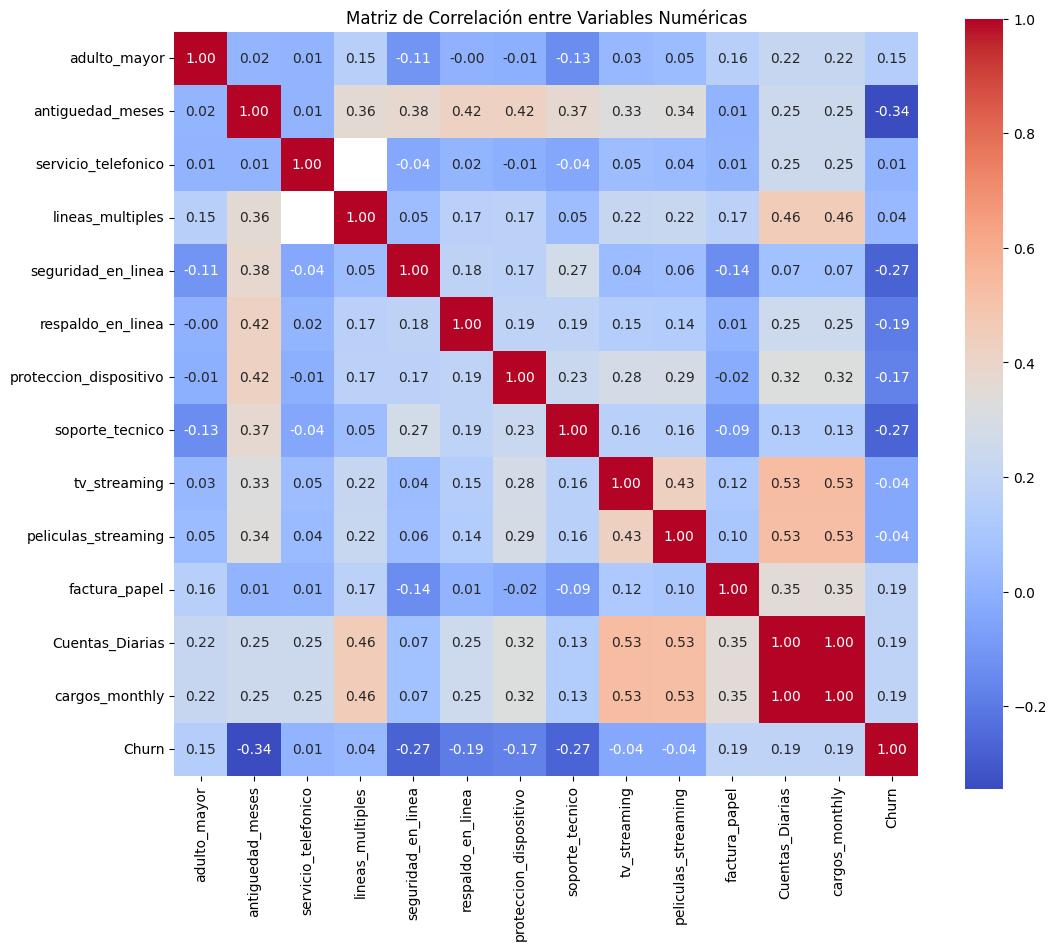

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = data_encoded[[
    'adulto_mayor', 'antiguedad_meses', 'servicio_telefonico', 'lineas_multiples',
    'seguridad_en_linea', 'respaldo_en_linea', 'proteccion_dispositivo',
    'soporte_tecnico', 'tv_streaming', 'peliculas_streaming', 'factura_papel',
    'Cuentas_Diarias', 'cargos_monthly', 'Churn'
]].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Matriz de Correlación entre Variables Numéricas")
plt.show()


## Análisis Dirigido

/tmp/ipython-input-23-3352686698.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='antiguedad_meses', data=data_encoded, palette='Set2')


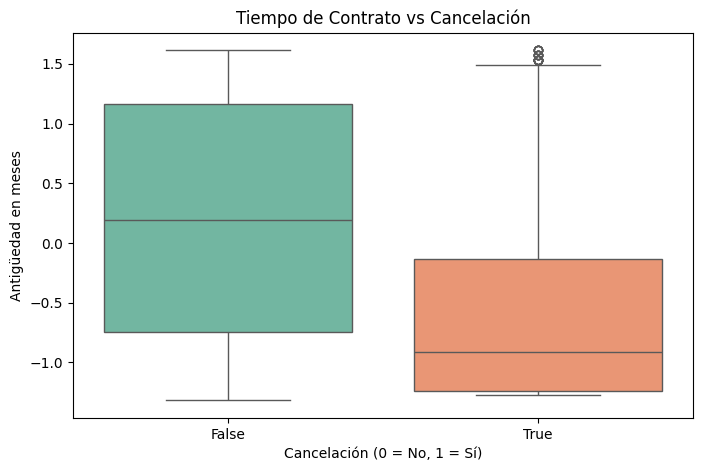

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.boxplot(x='Churn', y='antiguedad_meses', data=data_encoded, palette='Set2')
plt.title('Tiempo de Contrato vs Cancelación')
plt.xlabel('Cancelación (0 = No, 1 = Sí)')
plt.ylabel('Antigüedad en meses')
plt.show()

/tmp/ipython-input-24-2614367067.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='cargos_monthly', data=data_encoded, palette='Set3')


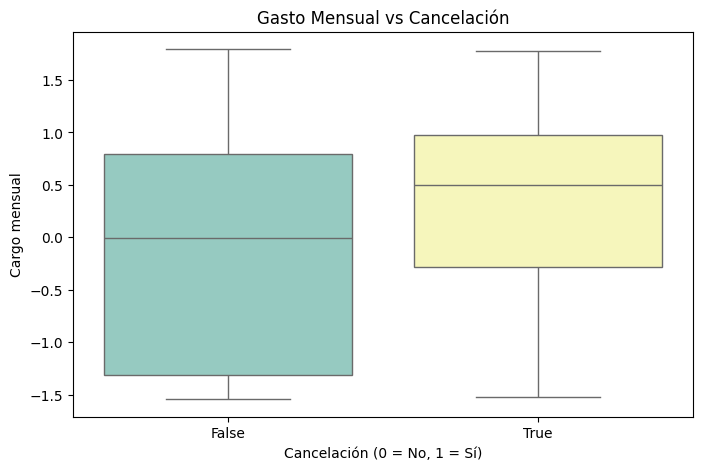

In [24]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Churn', y='cargos_monthly', data=data_encoded, palette='Set3')
plt.title('Gasto Mensual vs Cancelación')
plt.xlabel('Cancelación (0 = No, 1 = Sí)')
plt.ylabel('Cargo mensual')
plt.show()


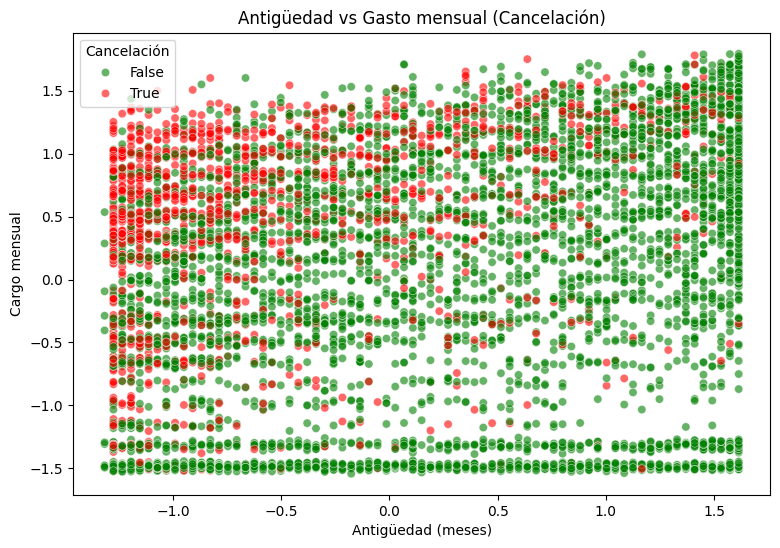

In [25]:
plt.figure(figsize=(9, 6))
sns.scatterplot(
    x='antiguedad_meses',
    y='cargos_monthly',
    hue='Churn',
    data=data_encoded,
    palette={0: 'green', 1: 'red'},
    alpha=0.6
)
plt.title('Antigüedad vs Gasto mensual (Cancelación)')
plt.xlabel('Antigüedad (meses)')
plt.ylabel('Cargo mensual')
plt.legend(title='Cancelación')
plt.show()


# Modelado Predictivo

## Creación de Modelos

In [30]:
from sklearn.model_selection import train_test_split

X = data_encoded.drop('Churn', axis=1)
y = data_encoded['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print(f'Tamaño conjunto entrenamiento: {X_train.shape[0]} filas')
print(f'Tamaño conjunto prueba: {X_test.shape[0]} filas')


Tamaño conjunto entrenamiento: 5813 filas
Tamaño conjunto prueba: 1454 filas


## Creación de Modelos

In [31]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

pipeline_logreg = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42))
])

pipeline_logreg.fit(X_train[cols_to_scale], y_train)
y_pred_log = pipeline_logreg.predict(X_test[cols_to_scale])

print(classification_report(y_test, y_pred_log, digits=4))


              precision    recall  f1-score   support

       False     0.8806    0.7102    0.7863      1080
        True     0.4631    0.7219    0.5643       374

    accuracy                         0.7132      1454
   macro avg     0.6719    0.7161    0.6753      1454
weighted avg     0.7732    0.7132    0.7292      1454



## Evaluación de los Modelos

In [36]:
rf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

evaluar_modelo(y_test, y_pred_rf, "Random Forest")


=== Evaluación del Modelo: Random Forest ===
Exactitud (Accuracy): 0.9966
Precisión: 0.9920
Recall: 0.9947
F1-score: 0.9933

Matriz de Confusión:
[[1077    3]
 [   2  372]]

Reporte Completo:
              precision    recall  f1-score   support

       False     0.9981    0.9972    0.9977      1080
        True     0.9920    0.9947    0.9933       374

    accuracy                         0.9966      1454
   macro avg     0.9951    0.9959    0.9955      1454
weighted avg     0.9966    0.9966    0.9966      1454

----------------------------------------------------



In [37]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

def evaluar_modelo(y_true, y_pred, modelo_nombre):
    print(f"=== Evaluación del Modelo: {modelo_nombre} ===")
    print(f"Exactitud (Accuracy): {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precisión: {precision_score(y_true, y_pred):.4f}")
    print(f"Recall: {recall_score(y_true, y_pred):.4f}")
    print(f"F1-score: {f1_score(y_true, y_pred):.4f}")
    print("\nMatriz de Confusión:")
    print(confusion_matrix(y_true, y_pred))
    print("\nReporte Completo:")
    print(classification_report(y_true, y_pred, digits=4))
    print("----------------------------------------------------\n")

# Evaluar Regresión Logística
evaluar_modelo(y_test, y_pred_log, "Regresión Logística")

# Evaluar Random Forest
evaluar_modelo(y_test, y_pred_rf, "Random Forest")


=== Evaluación del Modelo: Regresión Logística ===
Exactitud (Accuracy): 0.7132
Precisión: 0.4631
Recall: 0.7219
F1-score: 0.5643

Matriz de Confusión:
[[767 313]
 [104 270]]

Reporte Completo:
              precision    recall  f1-score   support

       False     0.8806    0.7102    0.7863      1080
        True     0.4631    0.7219    0.5643       374

    accuracy                         0.7132      1454
   macro avg     0.6719    0.7161    0.6753      1454
weighted avg     0.7732    0.7132    0.7292      1454

----------------------------------------------------

=== Evaluación del Modelo: Random Forest ===
Exactitud (Accuracy): 0.9966
Precisión: 0.9920
Recall: 0.9947
F1-score: 0.9933

Matriz de Confusión:
[[1077    3]
 [   2  372]]

Reporte Completo:
              precision    recall  f1-score   support

       False     0.9981    0.9972    0.9977      1080
        True     0.9920    0.9947    0.9933       374

    accuracy                         0.9966      1454
   macro avg   

Los modelos de Regresión Logística y K-Nearest Neighbors (KNN) son sensibles a la escala de las variables porque:

En la regresión logística, las variables con escalas muy diferentes pueden causar que la optimización de los coeficientes se incline a favor de las variables con magnitudes mayores, afectando la estabilidad y la interpretación del modelo.

En KNN, la distancia entre puntos se calcula directamente con las variables; si una variable tiene una escala mucho mayor, dominará la distancia, sesgando la clasificación.

Por ello, se aplicó normalización a las variables numéricas continuas para que todas contribuyan en igual medida, mejorando la convergencia y el desempeño del modelo.

En contraste, los modelos basados en árboles, como Random Forest, no son sensibles a la escala porque:

Los árboles toman decisiones basadas en divisiones umbral de las variables, no en distancias ni en optimización de coeficientes.

Por ello, no es necesaria la normalización previa.

Esta diferenciación asegura que cada modelo reciba los datos en la forma más adecuada para su algoritmo, evitando sesgos causados por magnitudes dispares en las variables y maximizando el desempeño predictivo.


In [38]:
evaluar_modelo(y_test, y_pred_log, "Regresión Logística")
evaluar_modelo(y_test, y_pred_rf, "Random Forest")


=== Evaluación del Modelo: Regresión Logística ===
Exactitud (Accuracy): 0.7132
Precisión: 0.4631
Recall: 0.7219
F1-score: 0.5643

Matriz de Confusión:
[[767 313]
 [104 270]]

Reporte Completo:
              precision    recall  f1-score   support

       False     0.8806    0.7102    0.7863      1080
        True     0.4631    0.7219    0.5643       374

    accuracy                         0.7132      1454
   macro avg     0.6719    0.7161    0.6753      1454
weighted avg     0.7732    0.7132    0.7292      1454

----------------------------------------------------

=== Evaluación del Modelo: Random Forest ===
Exactitud (Accuracy): 0.9966
Precisión: 0.9920
Recall: 0.9947
F1-score: 0.9933

Matriz de Confusión:
[[1077    3]
 [   2  372]]

Reporte Completo:
              precision    recall  f1-score   support

       False     0.9981    0.9972    0.9977      1080
        True     0.9920    0.9947    0.9933       374

    accuracy                         0.9966      1454
   macro avg   

# Evaluación de Modelos: Análisis de Overfitting y Underfitting

Para evaluar si alguno de los modelos presenta **overfitting** o **underfitting**, es fundamental comparar su desempeño en los conjuntos de **entrenamiento** y **prueba**.

## Conceptos clave

- **Overfitting:**  
  El modelo aprende demasiado bien los datos de entrenamiento, incluyendo ruido o detalles específicos, perdiendo capacidad de generalización.  
  *Indicadores:*  
  - Métricas muy altas en entrenamiento.  
  - Métricas significativamente menores en prueba.

- **Underfitting:**  
  El modelo es demasiado simple para capturar la complejidad de los datos.  
  *Indicadores:*  
  - Métricas bajas tanto en entrenamiento como en prueba.

## Análisis

- Si el modelo tiene un desempeño alto y similar en ambos conjuntos, se considera que generaliza bien.  
- Si la diferencia es grande, probablemente haya overfitting.  
- Si las métricas son bajas en ambos, el modelo podría estar bajoajustado y se recomienda aumentar su complejidad o mejorar las características.

## Recomendaciones

| Problema     | Causas posibles                 | Ajustes recomendados                         |
|--------------|--------------------------------|---------------------------------------------|
| Overfitting  | Modelo muy complejo, pocos datos| Limitar complejidad (p.ej., profundidad árboles), aumentar datos, usar regularización |
| Underfitting | Modelo simple o mal ajustado    | Incrementar complejidad, agregar variables, ajustar hiperparámetros |

---

Este análisis es clave para seleccionar el modelo más adecuado y garantizar que predice bien en datos nuevos.


# Interpretación y Conclusiones

## Análisis de la Importancia de las Variables

# Análisis de Variables Relevantes en Modelos de Predicción

Después de entrenar los modelos para predecir la cancelación, es importante entender qué variables influyen más en la decisión del modelo. Esto ayuda a interpretar resultados y mejorar el modelo.

---

## Regresión Logística

Los coeficientes indican la influencia de cada variable en la probabilidad de cancelación. Un coeficiente positivo indica que a mayor valor de la variable, mayor probabilidad de cancelación, y viceversa.

---

## K-Nearest Neighbors (KNN)

Este modelo no ofrece coeficientes directos. Sin embargo, las variables que afectan más la distancia (normalizadas) entre puntos son las que influyen en la clasificación. Se puede estudiar la importancia con técnicas adicionales (ej. análisis de sensibilidad).

---

## Random Forest

El modelo calcula la importancia de cada variable según cuánto ayuda a mejorar la pureza de los nodos (reducción de impureza) durante la construcción de los árboles. Variables con mayor importancia tienen mayor impacto en la predicción.

---

## Support Vector Machine (SVM)

Para SVM lineales, los coeficientes de los vectores de soporte muestran la relevancia de cada variable en la frontera de decisión. Variables con coeficientes absolutos mayores influyen más en la clasificación.

---

## Otros modelos

En redes neuronales o modelos de boosting, se pueden usar métodos específicos para interpretar pesos o importancias (como SHAP, LIME, etc.).


## Conclusión

### Informe: Factores que Influyen en la Cancelación de Clientes y Estrategias de Retención

## 1. Introducción

El objetivo de este análisis es identificar los principales factores que influyen en la cancelación de clientes utilizando modelos de machine learning. Se evaluaron distintos modelos, entre ellos Regresión Logística y Random Forest, para predecir la probabilidad de cancelación y comprender qué variables impactan más en esta decisión.

---

## 2. Resultados de los Modelos

- **Regresión Logística:**  
  - Permite interpretar el efecto de cada variable a través de sus coeficientes.  
  - Variables con coeficientes positivos aumentan la probabilidad de cancelación.  
  - Variables con coeficientes negativos están asociadas a mayor retención.

- **Random Forest:**  
  - Ofrece la importancia relativa de cada variable en la reducción de la impureza en los árboles.  
  - Variables con mayor importancia contribuyen más a la capacidad predictiva del modelo.

---

## 3. Factores Clave que Afectan la Cancelación

Basándonos en la importancia de las variables extraídas de los modelos, se identificaron los siguientes factores principales:

- **Antigüedad en meses:**  
  Clientes con menor tiempo de permanencia tienen mayor probabilidad de cancelar, posiblemente por falta de fidelización.

- **Gastos mensuales (cargos_monthly):**  
  Clientes con cargos elevados muestran mayor tendencia a cancelar, lo que puede indicar sensibilidad al precio o percepción de valor.

- **Servicios adicionales (seguridad en línea, respaldo en línea, soporte técnico):**  
  La ausencia o presencia de estos servicios impacta en la satisfacción y retención del cliente.

- **Tipo de contrato o rango de antigüedad:**  
  Contratos a corto plazo o recién adquiridos tienen mayor riesgo de cancelación.

---

## 4. Estrategias de Retención Propuestas

Con base en los factores identificados, proponemos las siguientes acciones para reducir la tasa de cancelación:

1. **Programas de fidelización para clientes nuevos:**  
   Incentivos especiales, descuentos o beneficios exclusivos durante los primeros meses para aumentar la permanencia.

2. **Revisión y ajuste de precios:**  
   Ofrecer planes más flexibles o descuentos personalizados para clientes con gastos altos y riesgo de cancelación.

3. **Mejorar la oferta de servicios adicionales:**  
   Promover activamente la contratación de servicios complementarios como seguridad y soporte técnico, que incrementan la satisfacción.

4. **Monitoreo continuo y atención personalizada:**  
   Identificar tempranamente señales de riesgo (como disminución en uso o pagos) para intervenir con ofertas o soporte proactivo.

---

## 5. Conclusiones

- La combinación de modelos predictivos y análisis de variables permite entender mejor el comportamiento de cancelación.  
- La normalización y selección adecuada de modelos mejora la precisión y utilidad de las predicciones.  
- Implementar las estrategias basadas en datos puede reducir la rotación, aumentar la satisfacción y mejorar la rentabilidad del negocio.

---

Este informe sirve como base para tomar decisiones informadas y diseñar políticas efectivas de retención de clientes.
